## Case Study 1
## Domain – Automotive
### focus – Incentivize drivers
### Business challenge/requirement

#### Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company.
#### Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.

#### You as a ML expert have to create a cluster model where drivers can be grouped together based on the driving data.
### Key issues
    Drivers will be incentivized based on the cluster, so grouping has to be accurate

### Considerations
NONE

### Data volume
- 4000 records – file driver-data.csv
### Fields in Data
• id: Unique Id of the driver
• mean_dist_day: Mean distance driven by driver per day
• mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('driver-data.csv')
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [3]:
df.id.nunique() # Check whether if any duplicates in 'id' values

4000

In [4]:
# As customer ids are unique, we can drop them from our analysis
df.drop('id', axis = 1, inplace = True)


In [5]:
df

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


# Try with 2 clusters

In [6]:
# Using the KMeans from sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters =  2)
kmeans.fit(df)
print(kmeans.labels_)
kmeans.cluster_centers_
df

[0 0 0 ... 1 1 1]


,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [8]:
df_2 = df

df_2['labels'] = kmeans.labels_
#df_2.labels.value_counts()
df

,mean_dist_day,mean_over_speed_perc,labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.scatter(df.mean_dist_day, df.mean_over_speed_perc)
plt.show()
sns.lmplot(x = 'mean_dist_day', y = 'mean_over_speed_perc', data = df_2, hue = 'labels',  palette='coolwarm',aspect=1,fit_reg=False);


KeyError: "['labels'] not in index"

In [9]:
df.drop('labels', axis = 1, inplace = True)

# Try with 4 clusters

In [13]:
kmeans_4 = KMeans(n_clusters = 4)
#
kmeans_4.fit(df)
print("Labels = ", kmeans_4.labels_)
print("Centers = ", kmeans_4.cluster_centers_)
df_4 = df
df_4['labels_4'] = kmeans_4.labels_
df_4

Labels =  [3 3 3 ... 1 1 1]
Centers =  [[4.99799964e+01 5.22434282e+00 1.44040331e-03]
 [1.80343118e+02 1.05201149e+01 1.00000000e+00]
 [1.77835096e+02 7.02884615e+01 3.00000000e+00]
 [5.04916785e+01 3.24917258e+01 2.00000000e+00]]


,mean_dist_day,mean_over_speed_perc,labels_4
0,71.24,28,3
1,52.53,25,3
2,64.54,27,3
3,55.69,22,3
4,54.58,25,3
...,...,...,...
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1


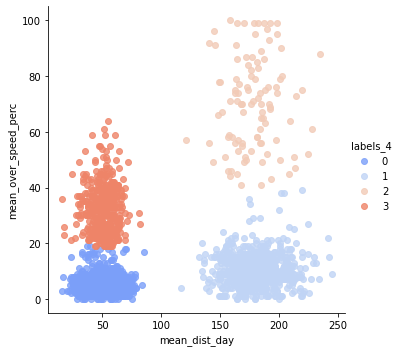

In [14]:
sns.lmplot(x = 'mean_dist_day', y = 'mean_over_speed_perc', data = df_4, hue = 'labels_4',  palette='coolwarm',aspect=1,fit_reg=False);
